In [103]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [104]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [105]:
import tensorflow as tf
import os

In [106]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [107]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [108]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [109]:
len(gpus)

1

In [110]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# remove dodgy images

In [113]:
import cv2
import imghdr

In [114]:
data_dir = '/content/drive/MyDrive/deep learning datasets/project_1/project_1/data'

In [115]:
image_exts = ['jpeg','jpg','bmp', 'png']

In [116]:
image_exts[0]

'jpeg'

In [117]:
os.listdir(data_dir)

['happy', 'sad']

In [118]:
os.listdir(os.path.join(data_dir, 'happy'))

['young-and-happy-people-vector-15114154.jpg',
 'images15.jpg',
 'Travis-Bradberry-Happy.jpg',
 'images.jpg',
 'images18.jpg',
 'images14.jpg',
 '1920px-face-smile.svg_.png',
 'images5.jpg',
 'image28.jpeg',
 'images10.jpg',
 'image16.jpeg',
 'happy-woman-in-nature-at-sunset.jpg',
 'image22.jpeg',
 'images13.jpg',
 'happy-people.jpeg',
 'happy-person.jpeg',
 'images20.jpg',
 'image13.jpeg',
 'Happy.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 'image20.jpeg',
 'images12.jpg',
 'images23.jpg',
 'happy-people-2.jpg',
 'happy-people-jump-with-raised-arms-characters-win_107791-14884.jpg',
 'happy_1_1678616873966_1678616915228_1678616915228.jpg',
 'images32.jpg',
 'happiness_thumbnail.jpg',
 'A_Sep20_14_1189155141.jpg',
 'Happy-people-800x533.jpg',
 'group-people-posing-photo-with-words-happy-bottom_577115-4097.jpg',
 'maxresdefault2.jpg',
 'happy-people2.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 'compassion.jpg',
 'file-20230208-27-3jttof.jpg',
 'happy-people-hands-lifted-upwards-1528

In [119]:
len(os.listdir(os.path.join(data_dir,'happy')))

96

In [120]:
len(os.listdir(os.path.join(data_dir,'sad')))

67

In [121]:
for image_class in os.listdir(data_dir):
  print(image_class)

happy
sad


In [122]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("image not in the ext list{}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("issue with image{}".format(image_path))


In [123]:
len(os.listdir(os.path.join(data_dir,'happy')))

96

In [124]:
len(os.listdir(os.path.join(data_dir,'sad')))

67

In [125]:
# load data

In [126]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [127]:
import numpy as np
from matplotlib import pyplot as plt

In [128]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/deep learning datasets/project_1/project_1/data')

Found 163 files belonging to 2 classes.


In [129]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [130]:
data_iterator = data.as_numpy_iterator()

In [131]:
data_iterator

In [132]:
batch = data_iterator.next()

In [133]:
len(batch)
# images + labels

2

In [134]:
batch[0].shape

(32, 256, 256, 3)

In [135]:
# batch[0]

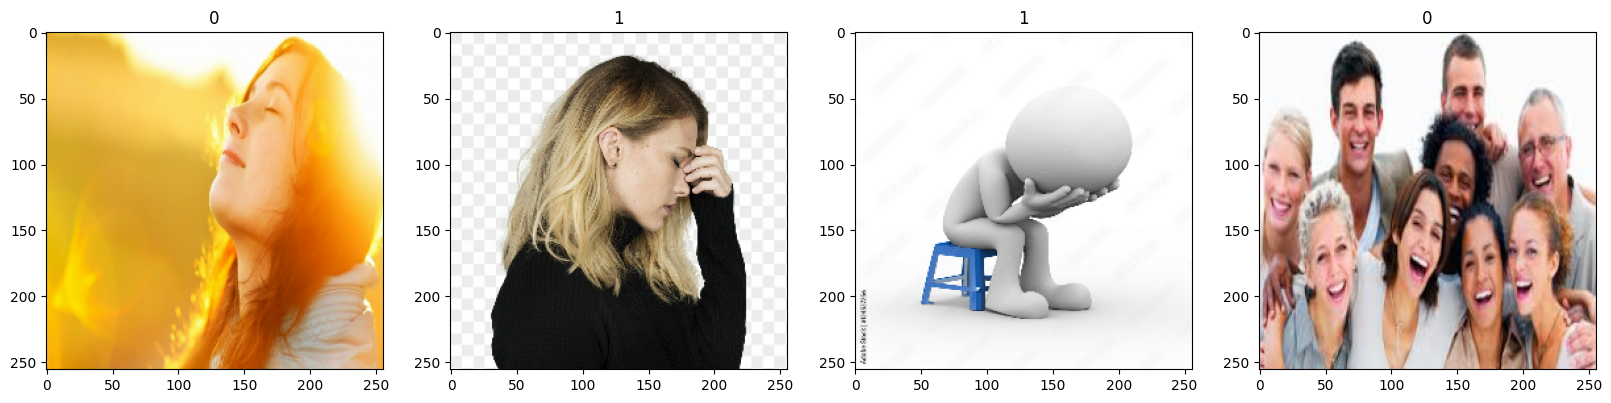

In [136]:
fig, ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [137]:
# class 1 : sad
# class 0 : happy

In [138]:
# preprocessing the data

In [139]:
# spliting te data and stuff

In [140]:
# scaling of data

In [141]:
batch[0].min()

0.0

In [142]:
batch[0].max()

255.0

In [143]:
# use the data pipeline to make it better

In [144]:
data = data.map(lambda x,y : (x/255, y))

In [145]:
# there are many scaling ways to scale the d ata

In [146]:
data.as_numpy_iterator().next()

(array([[[[0.25882354, 0.36862746, 0.07843138],
          [0.2521151 , 0.35407588, 0.06780138],
          [0.2317715 , 0.33373228, 0.0553009 ],
          ...,
          [0.922242  , 0.96145767, 0.6808817 ],
          [0.92012984, 0.9619803 , 0.6566999 ],
          [0.91688406, 0.9521782 , 0.63267756]],
 
         [[0.25882354, 0.36862746, 0.07843138],
          [0.24929959, 0.35126036, 0.06498586],
          [0.22883534, 0.33079612, 0.05236475],
          ...,
          [0.92719823, 0.96439385, 0.6949392 ],
          [0.91963845, 0.96148896, 0.66023284],
          [0.9137255 , 0.9517999 , 0.61796874]],
 
         [[0.25436515, 0.36416906, 0.07397299],
          [0.24306832, 0.34502912, 0.0587546 ],
          [0.22745098, 0.32941177, 0.05098039],
          ...,
          [0.9334909 , 0.9680727 , 0.7219133 ],
          [0.92163754, 0.96020985, 0.6767693 ],
          [0.9174326 , 0.9566483 , 0.6161841 ]],
 
         ...,
 
         [[0.5695542 , 0.69112283, 0.4597503 ],
          [0.55482

In [147]:
batch = data.as_numpy_iterator()

In [148]:
# fig, ax = plt.subplots(ncols = 4 , figsize = (20,20))
# for idx , img in enumerate(batch[0][:4]):
#   ax[idx].imshow(img)
#   ax[idx].title.set_text(batch[1][idx])

In [149]:
# split data

In [150]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [151]:
test_size + train_size + val_size

5

In [152]:
len(data)

6

In [153]:
train_data = data.take(train_size)
validate_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)

In [154]:
len(test_data)

1

In [155]:
# building the deep learning model

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense,Flatten , Dropout

In [157]:
model = Sequential()

In [158]:
model.add(Conv2D(16, (3,3) , 1 , activation='relu' , input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3) , 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3) , 1 , activation='relu' ))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [159]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [160]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [161]:
logdir = 'logs'

In [162]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [163]:
hist = model.fit(train_data,epochs=20, validation_data=validate_data, callbacks = [tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 12s 3s/step - loss: 0.8173 - accuracy: 0.5000 - val_loss: 0.6427 - val_accuracy: 0.6875
Epoch 2/20
3/3 [==============================] - 4s 981ms/step - loss: 0.6418 - accuracy: 0.5833 - val_loss: 0.5951 - val_accuracy: 0.5625
Epoch 3/20
3/3 [==============================] - 4s 988ms/step - loss: 0.5912 - accuracy: 0.6354 - val_loss: 0.5871 - val_accuracy: 0.5938
Epoch 4/20
3/3 [==============================] - 7s 3s/step - loss: 0.5272 - accuracy: 0.6667 - val_loss: 0.5333 - val_accuracy: 0.7812
Epoch 5/20
3/3 [==============================] - 4s 961ms/step - loss: 0.6217 - accuracy: 0.6458 - val_loss: 0.4375 - val_accuracy: 0.8750
Epoch 6/20
3/3 [==============================] - 4s 960ms/step - loss: 0.4690 - accuracy: 0.8125 - val_loss: 0.4327 - val_accuracy: 0.7812
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.4530 - accuracy: 0.6979 - val_loss: 0.5125 - val_accuracy: 0.6875
Epoch 8/20
3/3 [============

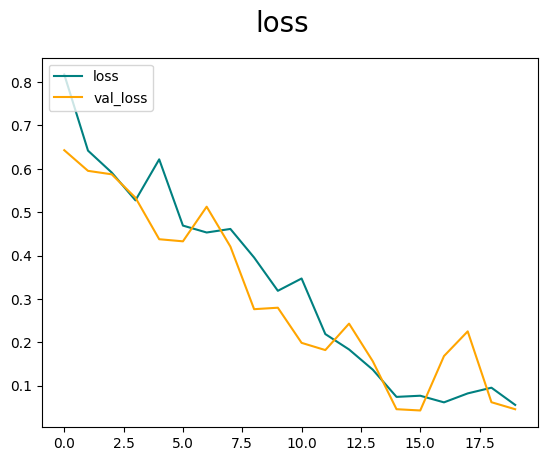

In [176]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

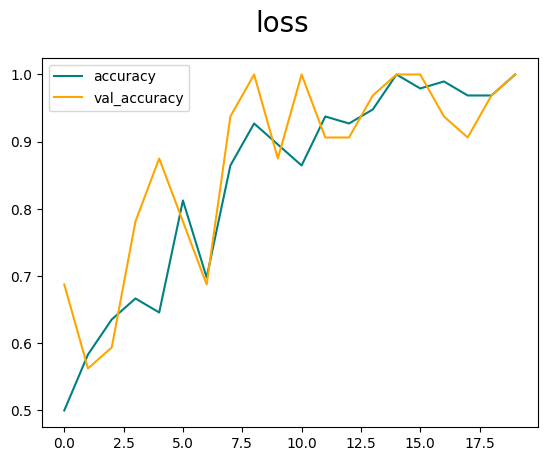

In [177]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [178]:
from tensorflow.keras.metrics import Precision , Recall, BinaryAccuracy

In [179]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [168]:
for batch in test_data.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 91ms/step


In [169]:
print(f'Precision:{pre.result().numpy()}, Recall : {re.result().numpy()}, Accuracy : {acc.result().numpy()}')

Precision:1.0, Recall : 1.0, Accuracy : 1.0


In [170]:
# test

In [180]:
import cv2

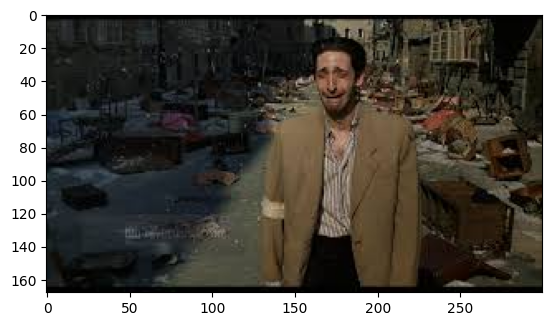

In [202]:
img = cv2.imread('/content/sad3.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

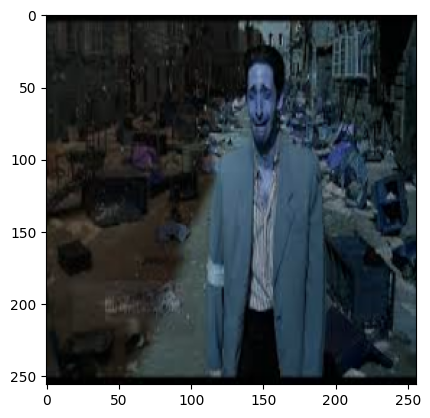

In [203]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [204]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 26ms/step


In [205]:
yhat

array([[0.77094287]], dtype=float32)

In [206]:
if yhat>0.5:
  print("Predicted : Sad")
else:
  print("Predicted : Happy")

Predicted : Sad


In [207]:
# save the model

In [209]:
from tensorflow.keras.models import load_model

In [210]:
model.save(os.path.join('models','happysadmodels.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [212]:
new_model = load_model(os.path.join('models', 'happysadmodels.h5'))

In [213]:
new_model

In [216]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [218]:
if yhatnew > 0.5:
  print("Sad")
else:
  print("Happy")

Sad


In [219]:
model.save(os.path.join('models','happysadmodels.tflite'))